  13% ━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132/1,000  [ 0:00:29 < 0:03:14 , 4 it/s ]

  13% ━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132/1,000  [ 0:00:29 < 0:03:14 , 4 it/s ]

  13% ━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132/1,000  [ 0:00:29 < 0:03:14 , 4 it/s ]

  13% ━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132/1,000  [ 0:00:29 < 0:03:14 , 4 it/s ]

KeyboardInterrupt: 

  13% ━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132/1,000  [ 0:00:30 < 0:03:14 , 4 it/s ]

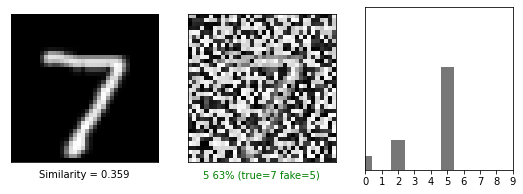

In [1]:
import cv2
import numpy as np
import tensorflow as tf
from MorphEnv import MorphEnv
from os.path import exists
from tensorflow.keras import datasets, layers, models
from stable_baselines3 import PPO, TD3
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise

model_victim = models.load_model('mnist')

img = cv2.resize(cv2.imread("Original.png", 0), (36, 36)).reshape(36, 36, 1)
img_label = 7
outcome = 5

env = MorphEnv(model_victim, img, img_label, outcome)
model_name = "MorphTD3.zip"

policy_name = "CnnPolicy"
buffer_size=200000
n_timesteps = 1000
learning_starts = 10000
batch_size = 256

n_actions = env.action_space.shape
action_noise = OrnsteinUhlenbeckActionNoise(np.zeros(n_actions), np.ones(n_actions) * 0.5)

model_attack = TD3(policy_name, env=env, buffer_size=buffer_size, learning_starts=learning_starts, batch_size=batch_size, action_noise=action_noise, verbose=0)

input("Start Training")

if (exists(f"{model_name}")):
    model_attack.set_parameters(model_name)
    
done = False
while not done:
    model_attack.learn(n_timesteps, progress_bar=True)
    model_attack.save(model_name)
    keep_training = input("Do you want to continue? [Y/N]: ")
    if keep_training not in "yY":
        done = True